In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

In [129]:
train_data = pd.read_csv('./mnist_test.csv')

In [130]:
print(train_data.head(5))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [131]:
labels_col = train_data['label']
print(labels_col.shape)
print(labels_col[19])

(10000,)
4


In [132]:
train_data_new = train_data.drop('label', axis = 1)

In [133]:
print(train_data_new.shape)

(10000, 784)


(784,)
2


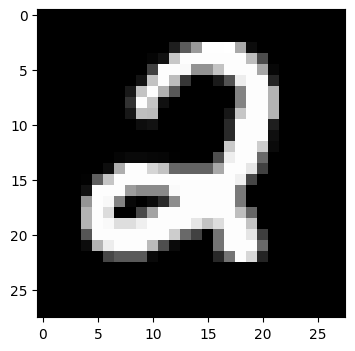

In [134]:
plt.figure(figsize = (4,4))

indx = 147

matrix_data = train_data_new.iloc[indx].values.reshape(28,28)
plt.imshow(matrix_data, interpolation = "none", cmap = "gray")

print(train_data_new.iloc[indx].shape)
print(labels_col[indx])

In [135]:
#implementation of the neural network architecture using only numpy.
#25 units in hidden layer1, 15 in hidden layer2, 1 last units of for softmax to linear.
def sigmoid(z):
    tmp = 1/(1+np.exp(-z))
    return tmp
    
def Dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros((1,units))
    for j in range(units):
        w = W[:,j]
        tmp = np.dot(w,a_in)+b[:,j]
        a_out[0][j] = tmp
    return a_out

def Relu_layer(a_in,W,b):
    a_out = np.zeros((1,W.shape[1]))
    zero_Arr = np.zeros((1,W.shape[1]))
    #a_out = np.maximum((np.dot(W.T, a_in)).T + b, zero_Arr)  # Apply ReLU activation using vectorized operation
    a_out = np.maximum(np.matmul(a_in,W) + b , zero_Arr)
    return a_out #.T in the end is for taking the transform.

#def Softmax_layer(a_in, W,b):
    #m,n = W.shape #in this case; m = 15,n = 10
    #a_out = np.zeros((1,n))
    #sum_deno = 0
    #for i in range(n):
        #z = np.dot(a_in.T,W[:,i].reshape((m,1)))+b[:,i]
        #sum_deno += np.exp(z)
    #for k in range(n):
        #a_out[:,k] = (np.exp(np.dot(a_in.T,W[:,k].reshape((m,1)))+b[:,k]))/sum_deno
    #return a_out
def value_ain(x,W1,W2,b1,b2):
    a1 = Relu_layer(x,W1,b1)
    a2 = Relu_layer(a1,W2,b2)
    return a2
    
#def Softmax_layer(a_in, W, b):
    #m, n = W.shape  # Shape of weights: (input_size, output_size)
    #z = np.dot(a_in.T, W) + b  # Logits calculation without transposition
    #z -= np.max(z, axis=1, keepdims=True)  # Logit scaling to prevent overflow
    #exp_z = np.exp(z)
    #sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
    #a_out = exp_z / sum_exp_z  # Softmax activation
    #return a_out
def find_max_ain(a_in):
    max_val = a_in[0, 0]  # Initialize max_val with the first element
    for i in range(1, a_in.shape[0]):  # Loop through the remaining elements
        if a_in[i, 0] > max_val:
            max_val = a_in[i, 0]  # Update max_val if a larger element is found
    return max_val
    
def Softmax_layer(a_in, W, b): #should  I incorporate the log(C) = -max(a_in)
    logits = np.zeros((1,W.shape[1]))
    for k in range(W.shape[1]):
        w = W[:,k].reshape((15,1))
        logits[:,k] = np.dot(a_in,w) + b[:,k]

    logc = np.max(logits)
    logits -= logc
    a_out = np.zeros((1, W.shape[1]))
    
    sum_exp = 0
    for i in range(W.shape[1]):
        sum_exp += np.exp(logits[:,i])
    for j in range(W.shape[1]):
        a_out[:,j] = (np.exp(logits[:,j]))/sum_exp

    return a_out
    

in_val = train_data_new.iloc[122].values.reshape((1,784))/255.0
a2 = value_ain(in_val, W1, W2, b1,b2)
print(a2.shape)

out_value = Softmax_layer(a2, W3, b3)
print(out_value)
#so now we see that both the relu and the softmax seem to be working.
print(out_value.shape)

(1, 15)
[[0.06447794 0.06245778 0.12348893 0.10809657 0.11374791 0.10149326
  0.08337611 0.07695045 0.14443621 0.12147483]]
(1, 10)


In [136]:
#the mnist database is for the numbers from 0-9, so for the softmax layer we will have to make 10 different o/ps
def Sequential(X,W1,W2,W3,b1,b2,b3):
    a1 = Relu_layer(X,W1,b1)
    a2 = Relu_layer(a1,W2,b2)
    a3 = Softmax_layer(a2,W3,b3)
    return a3

relu_test = Relu_layer(in_val,W1,b1)
print(relu_test.shape)
print(relu_test)

temp_testcase = train_data_new.iloc[12].values.reshape((1,784))/255.0
temp_val = Sequential(temp_testcase, W1, W2, W3, b1, b2, b3)
print(temp_val.shape)

(1, 25)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
(1, 10)


In [137]:
def he_initialization(n_prev_layer, n_curr_layer):
    return np.random.randn(n_prev_layer,n_curr_layer)*(np.sqrt(2/n_prev_layer))

W1 = he_initialization(784,25)
W2 = he_initialization(25,15)
W3 = he_initialization(15,10)

b1 = np.zeros((1,25))
b2 = np.zeros((1,15))
b3 = np.zeros((1,10))

print(W1.shape)
print(W3.shape)


a2 = np.zeros((1,15))
a2 = value_ain(train_data_new.iloc[6].values.reshape((1,784)), W1, W2, b1, b2)
a_in = Softmax_layer(a2, W3, b3)
print(a_in)

(784, 25)
(15, 10)
[[5.97208743e-86 1.77296203e-24 3.74269982e-45 6.30100470e-42
  1.79899056e-58 2.67840566e-34 1.00000000e+00 1.07530085e-21
  2.01214967e-23 2.01161732e-30]]


In [138]:
#gradient descent function to train the softmax layer:
#first we define the loss function 

#def Loss_softmax(a_out, y):
    #epsilon = 1e-7
    #loss = -np.log(a_out[:,y] + epsilon)  #maybe should be y+1?
    #return loss

#def threshold(a_in):
    #if(a_in>=0.5):
    #return 1
    #else:
        #return 0


def layer1_op(one_testcase, W1, b1):
    a1 = Relu_layer(one_testcase, W1, b1)
    return a1

x = train_data_new.iloc[5].values.reshape((1,784))
m = value_ain(x,W1,W2,b1,b2)
print(m.shape)

y = train_data_new.iloc[10].values.reshape((1,784))
print(layer1_op(y, W1, b1).shape)
print(layer1_op(y, W1, b1))

(1, 15)
(1, 25)
[[  0.          98.82667723   0.           0.           0.
    0.           0.         268.71971159   0.          16.19535866
    0.           0.           0.          71.00286936   0.
   17.46782378   0.          59.53599677 127.16966326   0.
   79.09731416   0.           0.           0.          47.99541886]]


In [139]:
#now it is important to note that we will require the dJ_dw3, dJ_dw2, dJ_dw1 as well, this is to do backpropagation.
def cal_grad_l3(one_testcase,W1_, W2_, b1_, b2_, W3_, b3_, y_):
    #y = label_col[indx]    #one testcase is the 784 pixel values of one training example.
    m,n = W3_.shape #in this case, m has a value if 15 and n has a value of 10
    dJ_dw3 = np.zeros((m,n))
    dJ_db3 = np.zeros((1,n))
    #this array will eventually carry the w values of all the w in the last layer.
    activations_prev = value_ain(one_testcase, W1_, W2_,b1_, b2_)
    a_op = Softmax_layer(activations_prev, W3_, b3_) ######there is an issue here.
    for i in range(n):
        if(i == y_): #y must be a single value and not an array
            y_in = 1 
        else:
            y_in = 0
        for j in range(m):
            dJ_dw3[j,i] = np.dot(a_op[:, i] - y_in, activations_prev[:, j])#(a_op[:,i] - y_in)*(activations_prev[:,j])
        dJ_db3[:,i] = (a_op[:,i] - y_in)

    return dJ_dw3, dJ_db3

def layer1_op(one_testcase, W1_, b1_):
    a1 = Relu_layer(one_testcase, W1_, b1_)
    return a1

one_test = train_data_new.iloc[14].values.reshape((1,784))/255.0
y_val = labels_col[14]
dj_dw3, dj_db3 = cal_grad_l3(one_test, W1, W2, b1, b2, W3, b3, y_val)
print(dj_dw3.shape)
print(dj_db3)
print(dj_db3.shape)

output = layer1_op(one_test, W1,b1)
print(output)
print(output.shape)

(15, 10)
[[ 0.07814119 -0.90548804  0.10332898  0.10226572  0.08723517  0.12708319
   0.10410751  0.09599446  0.10064177  0.10669005]]
(1, 10)
[[0.         0.115445   0.         0.         0.24161349 0.10186623
  0.08524261 0.         0.         0.23326737 0.         0.
  0.22240874 0.         0.         0.02192371 0.         0.
  0.5168824  0.21153329 0.         0.         0.36230087 0.
  0.20942899]]
(1, 25)


In [140]:
#now the other calulate gradient functions are for the backpropagation through the previous layers.
def cal_grad_l2l1(one_testcase,_W1,_W2,_W3,_b1,_b2, _b3, y):
    g, h = _W1.shape  #one_testcase has to have dimensions 784, 1 for this to function.
    m, n = _W2.shape #in this case, m has a value of 25 and n has a value of 15
    dJ_dw2 = np.zeros((m,n)) 
    dJ_db2 = np.zeros((1,n))
    dJ_dw1 = np.zeros((g,h))
    dJ_db1 = np.zeros((1,h))
    del1 = np.zeros((1,h)) #was initially de1 = np.zeros((2,25))
    z2 = layer1_op(one_testcase,_W1,_b1).reshape((1,h))
    activations_prev = value_ain(one_testcase, _W1, _W2,_b1, _b2).reshape((1,n))
    output_values = Softmax_layer(activations_prev, _W3, _b3)
    del3 = np.zeros((1,10))
    label_val = np.zeros((1,10))
    layer2_ip = layer1_op(one_testcase, _W1, _b1).reshape((1,m))
    for k in range(10):
        if(k == y):
            label_val[:,k] = 1
        else:
            label_val[:,k] = 0
    for i in range(10):
        del3[:,i] = output_values[:,i] - label_val[:,i] #del3 will be having shape (1,10)
    del2 = np.zeros((1,n))
    relu_deri = np.zeros((1,n))
    for t in range(n):
        if(activations_prev[:,t] > 0):
            relu_deri[:,t] = 1
        else:
            relu_deri[:,t] = 0
    del2 = np.matmul(del3, _W3.T)* relu_deri
    deri_relu_l1 = np.zeros((1,h))
    for i1 in range(n): #n is 15 in this case 
        for j1 in range(m): #m is 25in this case
            dJ_dw2[j1,i1] = np.dot(del2[:,i1] , layer2_ip[:,j1]) 
        dJ_db2[:,i1] = del2[:,i1]    #this can be an issue.
    for b in range(h):
        if(z2[:,b] > 0):
            deri_relu_l1[:,b] = 1
        else:
            deri_relu_l1[:,b] = 0
    del1 = np.matmul(del2,_W2.T)*deri_relu_l1
    for outer in range(h): #this one evaluates to 25  
        for inner in range(g): # this evaluates to 784
            dJ_dw1[inner,outer] = np.dot(del1[:,outer] ,one_testcase[:,inner]) #the issue persists i
        dJ_db1[:,outer] = del1[:,outer]
        
    return dJ_dw2, dJ_dw1 , dJ_db2 , dJ_db1
new_W1 = W1
new_W2 = W2
new_W3 = W3
new_b1 = b1
new_b2 = b2
new_b3 = b3
derJ_dw2, derj_dw1, derJ_db2, derJ_db1 = cal_grad_l2l1(one_test,new_W1,new_W2,new_W3,new_b1,new_b2,new_b3,y_val)
print(derj_dw1)
#temp_W1 = new_W1 - 0.1*derj_dw1
#print(new_W1)
print("---------------------------------------------------------------------")
#print(temp_W1)
#the calculation of gradients for W1 is not taking place. This needs to be fixed.

[[ 0.  0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 ...
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]
 [ 0.  0.  0. ...  0. -0.  0.]]
---------------------------------------------------------------------


In [155]:
#we now need a loss function and then gradient descent algorithm.
def softmax_loss(one_testcase, W_1, W_2, W_3, b_1, b_2, b_3, y):
    output = Sequential(one_testcase , W_1, W_2, W_3, b_1, b_2, b_3)
    loss = -np.log(output[0,int(y)])
    return loss.item()
            
            
#gradient descent will be run on batches of 10 examples 
def gradient_descent_algo(batch_100 , W_3, W_2, W_1, b_3, b_2, b_1, corresp_labels, learning_rate):
    alpha = learning_rate
    #L_batch_hist = []
    #W3_batch_hist = []
    #W2_batch_hist = []
    #W1_batch_hist = []
    
    #num_iters = batch_100.shape[0]
    #for k in range(num_iters):
        #dJ_dw3, dJ_db3 = cal_grad_l3(batch_100[k,:].reshape((1,784))/255.0,W_1, W_2, b_1, b_2, W_3, b_3, corresp_labels[k,:]) #need to figure out what the y is here
        #W_3 = W_3 - (alpha)*dJ_dw3
        #b_3 = b_3 - (alpha)*dJ_db3

        #dJ_dw2 , dJ_dw1 , dJ_db2, dJ_db1 = cal_grad_l2l1(batch_100[k,:].reshape((1,784))/255.0, W_1, W_2,W_3,b_1, b_2, b_3 , corresp_labels[k,:])
        #W_2 = W_2 - (alpha)*dJ_dw2 
        #b_2 = b_2 - (alpha)*dJ_db2
        #W_1 = W_1 - (alpha)*dJ_dw1 
        #b_1 = b_1 - (alpha)*dJ_db1

        #loss = softmax_loss(batch_100[k,:], W_1, W_2, W_3, b_1, b_2, b_3, corresp_labels[k,:]) #the error is due to the fact that this is an array.
        #L_batch_hist.append(loss)

        #if(k % 5 == 0):
            #W3_batch_hist.append(W_3.copy())
            #W2_batch_hist.append(W_2.copy())
            #W1_batch_hist.append(W_1.copy())

    #print(f"The value of W_1 is {W_1}")
    #print(f"Loss: {loss:.4f}")

    #return W_3, W_2, W_1, b_3, b_2, b_1

def gradient_descent_algo(batch_100 , W_3, W_2, W_1, b_3, b_2, b_1, corresp_labels, learning_rate):
    alpha = learning_rate
    
    num_iters = batch_100.shape[0]
    for k in range(num_iters):
        # Compute gradients
        dJ_dw3, dJ_db3 = cal_grad_l3(batch_100[k, :].reshape((1, 784)) / 255.0, W_1, W_2, b_1, b_2, W_3, b_3, corresp_labels[k, :])
        dJ_dw2, dJ_dw1, dJ_db2, dJ_db1 = cal_grad_l2l1(batch_100[k, :].reshape((1, 784)) / 255.0, W_1, W_2, W_3, b_1, b_2, b_3, corresp_labels[k, :])

        # Update weights and biases
        W_3 -= alpha * dJ_dw3
        b_3 -= alpha * dJ_db3

        W_2 -= alpha * dJ_dw2
        b_2 -= alpha * dJ_db2

        W_1 -= alpha * dJ_dw1
        b_1 -= alpha * dJ_db1

        # Compute and print loss
        loss = softmax_loss(batch_100[k, :], W_1, W_2, W_3, b_1, b_2, b_3, corresp_labels[k, :])
        if k % 10 == 0:  # Print every 10 iterations
            print(f"Iteration {k}, Loss: {loss:.4f}")
            print(f"W_2: {W_2}")

    return W_3, W_2, W_1, b_3, b_2, b_1
        
#test_W3, test_W2, test_W1, test_b3,test_b2,test_b1 = gradient_descent_algo(train_data_new[:100], new_W3, new_W2,new_W1, new_b3, new_b2, new_b1, labels_col[:100],0.1)


In [142]:

#def grad_desc_datafeeder(training_data_new, labels_col_arr,W_global3,W_global2, W_global1, b_global3, b_global2, b_global1,learning_rate): #shape of train_data_new is (10000,784) and the shape of labels_col is (10000,1)
    #rows_per_run = 10
    #total_rows = train_data_new.shape[0]
    #num_epoch = total_rows//rows_per_run
    #for i in range(num_epoch): #this range is 1000
        #push_arr = np.zeros((10,784))
        #push_labels = np.zeros((10,1))
        #for j in range(rows_per_run):#this range is 10.
            #temp_arr = np.zeros((1,784))
            #temp_arr = training_data_new.iloc[10*i + j].values.reshape((1,784))
            #push_labels[j,:] = labels_col_arr.iloc[10*i+j]
            #push_arr[j,:] = temp_arr
        #W_global3,W_global2, W_global1, b_global3, b_global2, b_global1 = gradient_descent_algo(push_arr, W_global3,W_global2, W_global1, b_global3, b_global2, b_global1,push_labels,learning_rate)
        #return W_global3,W_global2, W_global1, b_global3, b_global2, b_global1

def grad_desc_datafeeder(training_data_new, labels_col_arr, W_global3, W_global2, W_global1, b_global3, b_global2, b_global1, learning_rate):
    rows_per_run = 100
    total_rows = training_data_new.shape[0]
    num_epoch = total_rows // rows_per_run
    
    for i in range(num_epoch):
        push_arr = np.zeros((rows_per_run, 784))
        push_labels = np.zeros((rows_per_run, 1))
        
        for j in range(rows_per_run):
            index = 100 * i + j
            push_arr[j, :] = training_data_new.iloc[index].values.reshape((1,784))
            push_labels[j, :] = labels_col_arr.iloc[index]
            
        W_global3, W_global2, W_global1, b_global3, b_global2, b_global1 = gradient_descent_algo(
            push_arr, W_global3, W_global2, W_global1, b_global3, b_global2, b_global1, push_labels, learning_rate
        )
    
    return W_global3, W_global2, W_global1, b_global3, b_global2, b_global1

In [143]:
W_global_3 = W3
W_global_2 = W2
W_global_1 = W1

b_global_3 = b3
b_global_2 = b2
b_global_1 = b1

learning_rate = 0.1

W3_final, W2_final, W1_final, b3_final,b2_final,b1_final = grad_desc_datafeeder(train_data_new, labels_col,W_global_3,W_global_2, W_global_1, b_global_3,b_global_2,b_global_1,learning_rate)
print(b1_final)
print("above is the updated W1 and below is the he initialised")
print(b1)

/tmp/ipykernel_12171/1838538200.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss = -np.log(output[0,int(y)])


Iteration 0, Loss: -0.0000
Iteration 10, Loss: -0.0000
Iteration 20, Loss: 0.0000
Iteration 30, Loss: 58.1628
Iteration 40, Loss: -0.0000
Iteration 50, Loss: 53.7491
Iteration 60, Loss: -0.0000


/tmp/ipykernel_12171/1838538200.py:4: RuntimeWarning: divide by zero encountered in log
  loss = -np.log(output[0,int(y)])


Iteration 70, Loss: -0.0000
Iteration 80, Loss: -0.0000
Iteration 90, Loss: 0.1734
Iteration 0, Loss: 6.1504
Iteration 10, Loss: 21.4832
Iteration 20, Loss: 8.8384
Iteration 30, Loss: 24.4903
Iteration 40, Loss: 53.4976
Iteration 50, Loss: 0.0377
Iteration 60, Loss: 113.4842
Iteration 70, Loss: -0.0000
Iteration 80, Loss: -0.0000
Iteration 90, Loss: -0.0000
Iteration 0, Loss: 86.1751
Iteration 10, Loss: -0.0000
Iteration 20, Loss: -0.0000
Iteration 30, Loss: 11.9092
Iteration 40, Loss: 0.8991
Iteration 50, Loss: -0.0000
Iteration 60, Loss: -0.0000
Iteration 70, Loss: 170.2783
Iteration 80, Loss: 50.0807
Iteration 90, Loss: 9.1474
Iteration 0, Loss: 7.3009
Iteration 10, Loss: 47.6047
Iteration 20, Loss: 8.6810
Iteration 30, Loss: -0.0000
Iteration 40, Loss: -0.0000
Iteration 50, Loss: -0.0000
Iteration 60, Loss: -0.0000
Iteration 70, Loss: -0.0000
Iteration 80, Loss: -0.0000
Iteration 90, Loss: 1.6610
Iteration 0, Loss: 1.5733
Iteration 10, Loss: -0.0000
Iteration 20, Loss: 2.5746
Itera

In [146]:
print(b_global_1)
print("--------------------")
print(b1)

[[-0.13011767 -0.07364311 -0.53745795 -0.13228532  0.02430842  0.56998975
  -0.05705152 -0.3562023  -0.11334632 -0.50727588 -0.04712649 -0.07291334
  -0.06799789 -0.30797123 -0.02796951 -0.02168001 -0.0703477  -0.19576718
  -0.0451518  -0.03695573 -0.04483675 -0.04052547 -0.04015499 -0.03301704
  -0.10964216]]
--------------------
[[-0.13011767 -0.07364311 -0.53745795 -0.13228532  0.02430842  0.56998975
  -0.05705152 -0.3562023  -0.11334632 -0.50727588 -0.04712649 -0.07291334
  -0.06799789 -0.30797123 -0.02796951 -0.02168001 -0.0703477  -0.19576718
  -0.0451518  -0.03695573 -0.04483675 -0.04052547 -0.04015499 -0.03301704
  -0.10964216]]


In [86]:
print(labels_col.shape)
print(labels_col.iloc[255])

(10000,)
7


In [33]:
my_array = [1,10,8,6,7,4,65,12]
my_variable = my_array[2]
print(-np.log(my_variable))

-2.0794415416798357
